### Gera os gráficos das bases de dados coletadas

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
dataNames = [
    "PETR3_B_0_30min", 
    "WDOFUT_F_0_30min", 
    "WINFUT_F_0_30min",
]

setDivision = [0.1, 0.7, 0.2]              # Size of the [optimization, train, test] set
outputName  = "Fechamento"                 # Name of the output variable0

dir_name = f"../Results/datasPlots"
if not os.path.exists(dir_name):
    os.makedirs(dir_name)

for dataName in dataNames:
    Y = pd.read_csv(f'../Data/Generated/{dataName}_OUT.csv', sep=";")['OutPut |T+1|']
    plt.figure(figsize=(10, 5))
    plt.plot(Y)
    plt.axvline(x=len(Y) * 0.1, color='red', linestyle='--')
    plt.axvline(x=len(Y) * 0.8, color='blue', linestyle='--')
    plt.text(len(Y) * -0.03, Y.max() * 1, 'Otimização', color='red')
    plt.text(len(Y) * 0.38, Y.max() * 1, 'Treinamento', color='black')
    plt.text(len(Y) * 0.90, Y.max() * 1, 'Teste', color='blue')
    plt.legend()
    # plt.title(f"Ativo {dataName.split('_')[0]}")
    plt.xticks([])
    plt.xlabel("Amostras")
    plt.ylabel("Valor (R$)")
    plt.savefig(f"{dir_name}/{dataName.split('_')[0]}_fechamento.png")
    plt.close()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


### Verifica os melhores modelos para cada base de dados

In [4]:
from models_classification import GetModelsClassification
from models_regression import GetModelsRegression

dataNames = [
    "PETR3_B_0_30min", 
    "PETR3_B_0_60min", 

    "WDOFUT_F_0_30min", 
    "WDOFUT_F_0_60min", 

    "WINFUT_F_0_30min",
    "WINFUT_F_0_60min",
]

for dataName in dataNames:
    SVM, KNN, LR = GetModelsClassification(dataName)        # Obtém os modelos de classificação
    MLP, SVR, RF = GetModelsRegression(dataName)          # Obtém os modelos de regressão

    print(f"-------- Modelos definidos para a base de dados {dataName} --------")
    print(f"Modelos de classificação: ")
    print(f"Modelo SVM: {SVM.get_params()}")
    print(f"Modelo KNN: {KNN.get_params()}")
    print(f"Modelo LR : {LR.get_params()}", end="\n\n")
    print(f"Modelos de regressão: ")
    print(f"Modelo MLP: {MLP.get_params()}")
    print(f"Modelo SVR: {SVR.get_params()}")
    print(f"Modelo RF : {RF.get_params()}")
    print(f"-------------------------------------------------------------------", end="\n\n")

-------- Modelos definidos para a base de dados PETR3_B_0_30min --------
Modelos de classificação: 
Modelo SVM: {'C': 15.01, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 1, 'decision_function_shape': 'ovr', 'degree': 4, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Modelo KNN: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 34, 'p': 1, 'weights': 'distance'}
Modelo LR : {'C': 10, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': False, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 50, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': True}

Modelos de regressão: 
Modelo MLP: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping':

### Gera tabelas de comparação para modelos de regressão

In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# import numpy as np
# import pandas as pd
# import os

# dataNames = [
#     "PETR3_B_0_30min", 
#     "WDOFUT_F_0_30min", 
#     "WINFUT_F_0_30min",

#     "PETR3_B_0_60min", 
#     "WDOFUT_F_0_60min", 
#     "WINFUT_F_0_60min",
# ]

# setDivision = [0.1, 0.7, 0.2]              # Size of the [optimization, train, test] set
# outputName  = "Fechamento"                 # Name of the output variable0

# dir_name = f"../Results/test/logs/regression"
# if not os.path.exists(dir_name):
#     os.makedirs(dir_name)

# for dataName in dataNames:
#     res = pd.DataFrame(columns=['Model', 'MAE', 'RMSE'])
#     datasRegression = pd.read_csv(f'../Results/test/regression/{dataName}_predictions.csv', sep=";")
#     datasStatistics = pd.read_csv(f'../Results/test/statistic/{dataName}_predictions.csv', sep=";")
#     outDatas = pd.read_csv(f'../Data/Cut/statistic/Y/Test_{dataName}.csv', sep=";")['OutPut |T+1|']
#     datas = pd.concat([datasRegression, datasStatistics], axis=1)
#     print("Data Name:       ", dataName)
#     print("Datas Shape:     ", datas.shape)
#     print("OutDatas Shape:  ", outDatas.shape)
#     for colum in datas.columns:
#         mae = mean_absolute_error(outDatas, datas[colum])
#         rmse = np.sqrt(mean_squared_error(outDatas, datas[colum]))
#         res = pd.concat([res, pd.DataFrame([[colum, mae, rmse]], columns=['Model', 'MAE', 'RMSE'])], axis=0)
#     res.to_csv(f"{dir_name}/{dataName}.csv", sep=";", index=False)

Data Name:        PETR3_B_0_30min
Datas Shape:      (1342, 6)
OutDatas Shape:   (1342,)
Data Name:        WDOFUT_F_0_30min
Datas Shape:      (1610, 6)
OutDatas Shape:   (1610,)
Data Name:        WINFUT_F_0_30min
Datas Shape:      (1610, 6)
OutDatas Shape:   (1610,)
Data Name:        PETR3_B_0_60min
Datas Shape:      (683, 6)
OutDatas Shape:   (683,)
Data Name:        WDOFUT_F_0_60min
Datas Shape:      (802, 6)
OutDatas Shape:   (802,)
Data Name:        WINFUT_F_0_60min
Datas Shape:      (802, 6)
OutDatas Shape:   (802,)


## Exibe logs para modelos treinados

In [3]:
import os 
import pandas as pd
# print("Operations History:        \n", operationsHistory.to_string(index=False))

path = "../Results/test/logs/class"
files = os.listdir(path)
for file in files:
    if file.endswith(".csv"):
        print(f"================================================ {file} ===========================================================")
        df = pd.read_csv(path+"/"+file, sep=";")
        print(df.to_string(index=False), end="\n\n")


================================================ WDOFUT_F_0_30min_logs.csv ===========================================================
                  model  qtdBuying  inirialValue  finalValue  percentual  accuracy       f1  truePositives  trueNegatives  falsePositives  falseNegatives
                    SVM        170          1000  882.153158  -11.784684  0.503106 0.614644          172.0          638.0           640.0           160.0
                    KNN        382          1000  978.122811   -2.187719  0.500000 0.516517          375.0          430.0           437.0           368.0
                     LR        191          1000  869.545604  -13.045440  0.514907 0.557005          338.0          491.0           474.0           307.0
                    MLP        318          1000  999.648689   -0.035131  0.546584 0.551046          432.0          448.0           380.0           350.0
                    SVR        260          1000 1006.873351    0.687335  0.511180 0.498407    

### Exibe logs de regressão

In [ ]:
# import os 
# import pandas as pd
# # print("Operations History:        \n", operationsHistory.to_string(index=False))

# path = "../Results/test/logs/regression"
# files = os.listdir(path)
# for file in files:
#     if file.endswith(".csv"):
#         print(f"================================================ {file} ===========================================================")
#         df = pd.read_csv(path+"/"+file, sep=";")
#         print(df.to_string(index=False), end="\n\n")

================================================ WINFUT_F_0_30min.csv ===========================================================
 Model       MAE      RMSE
   MLP 10.398728 12.262003
   SVR 10.496919 12.291261
    RF 10.241763 12.090174
 ARIMA  0.334360  0.472185
SARIMA  0.340123  0.480152
 GARCH  1.894884  2.525112

================================================ WDOFUT_F_0_60min.csv ===========================================================
 Model        MAE       RMSE
   MLP 822.007693 876.189112
   SVR 797.350076 862.645074
    RF 798.307551 865.278502
 ARIMA  12.897106  18.060969
SARIMA  13.198164  18.304201
 GARCH  74.029463  94.754505

================================================ WDOFUT_F_0_30min.csv ===========================================================


 Model        MAE       RMSE
   MLP 824.268640 838.712109
   SVR 854.423987 868.547156
    RF 823.880630 840.179858
 ARIMA   9.663642  13.786633
SARIMA   9.837974  13.986968
 GARCH  50.555641  64.577240

================================================ PETR3_B_0_60min.csv ===========================================================
 Model      MAE     RMSE
   MLP 7.646241 7.862580
   SVR 8.471994 8.593133
    RF 7.953272 8.135516
 ARIMA 0.079205 0.114771
SARIMA 0.079692 0.114520
 GARCH 0.604997 0.836969

================================================ WINFUT_F_0_60min.csv ===========================================================
 Model      MAE      RMSE
   MLP 9.863595 11.678808
   SVR 9.509056 11.335094
    RF 9.937575 11.735744
 ARIMA 0.501761  0.689591
SARIMA 0.503149  0.689728
 GARCH 2.670904  3.448406

================================================ PETR3_B_0_30min.csv ===========================================================
 Model      MAE     RMSE
   MLP 8.080138 8.263407

## Exibe logs para estratégias implementadas

In [ ]:
# import os 
# import pandas as pd
# # print("Operations History:        \n", operationsHistory.to_string(index=False))

# path = "../Results/test/logs/economic"
# files = os.listdir(path)
# for file in files:
#     if file.endswith(".csv"):
#         print(f"================================================ {file} ===========================================================")
#         df = pd.read_csv(path+"/"+file, sep=";")
#         print(df.to_string(index=False), end="\n\n")

================================================ ensamble2_buying.csv ===========================================================
                         model  qtdBuying  inirialValue  finalValue  percentual
    strat_TCC_WINFUT_F_0_30min        395          1000 1170.904231   17.090423
strat_hurwicz_WINFUT_F_0_30min          1          1000 1181.388929   18.138893
                  Buy and Hold          1          1000 1178.706030   17.870603
     strat_TCC_PETR4_B_0_30min         48          1000 1347.181726   34.718173
 strat_hurwicz_PETR4_B_0_30min          1          1000 1306.487696   30.648770
                  Buy and Hold          1          1000 1310.886644   31.088664
      strat_TCC_PETR3_B_0_5min        332          1000  823.566918  -17.643308
  strat_hurwicz_PETR3_B_0_5min          1          1000  856.312292  -14.368771
                  Buy and Hold          1          1000  856.312292  -14.368771
    strat_TCC_WDOFUT_F_0_60min        183          1000 1069.349540   

FileNotFoundError: [Errno 2] No such file or directory: '../Results/comparasion/PETR3_B_0_30min_predictions.png'

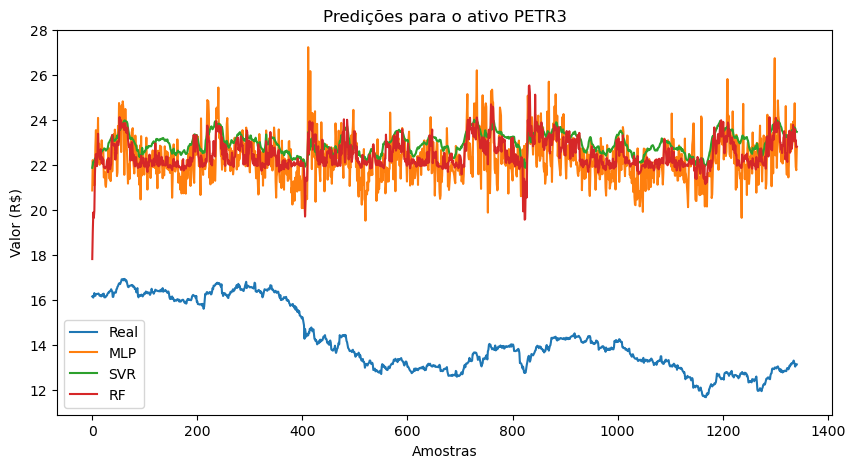

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

dataNames = [
    "PETR3_B_0_30min", 
    "WDOFUT_F_0_30min", 
    "WINFUT_F_0_30min",

    "PETR3_B_0_60min", 
    "WDOFUT_F_0_60min", 
    "WINFUT_F_0_60min",
]

for dataName in dataNames:
    predictions = pd.read_csv(f'../Results/test/regression/{dataName}_predictions.csv', sep=";")
    real = pd.read_csv(f'../Data/Cut/statistic/Y/Test_{dataName}.csv', sep=";")['OutPut |T+1|']

    plt.figure(figsize=(10, 5))
    plt.plot(real, label="Real")
    for column in predictions.columns:
        plt.plot(predictions[column], label=column)
    plt.legend()
    plt.title(f"Predições para o ativo {dataName.split('_')[0]}")
    plt.xlabel("Amostras")
    plt.ylabel("Valor (R$)")
    plt.savefig(f"../Results/comparasion/{dataName}_predictions.png")
